<a href="https://colab.research.google.com/github/Ajjme/Feedback_Systems/blob/main/Naked_Planet_Scripy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
fontsize=9
plt.rcParams['font.size'] = fontsize


In [2]:
########################################################################
# functions
########################################################################
# Right hand side to be integrated:
def right_hand_side(t, T, depth):
  T_atm=T[0]
  T_ocn=T[1]
  lambda_LW = 4/3 # 3C/(4W/m^2) longwave radiative cooling coefficient
  c_atm = c_p * rho_w * 50 #specific heat of upper ocean and atmosphere
  dF = 4 #radiative forcing
  c_ocn = c_p * rho_w * depth #the specific heat of the ocean
  gamma = 1 #strength of coupling between surface and deep
  dT_atm_dt = ((dF - lambda_LW*T_atm) - gamma*(T_atm-T_ocn))/c_atm
  dT_ocn_dt = gamma*(T_atm-T_ocn)/c_ocn
  return [dT_atm_dt, dT_ocn_dt]


def solve_ODE(depth):
  """
  Solve the ODE for a given ocean depth
  Input: Depth of the ocean.
  Output: ocean temperature time series, atmospheric temerature
  time series, and the time axis.
  """
  y0=T0
  tspan=(times_save[0],times_save[-1])
  sol = solve_ivp(fun=lambda t,T: right_hand_side(t,T,depth) #scripy
  ,vectorized=False,y0=T0,t_span=tspan,t_eval=times_save)
  time_array=sol.t
  T_atm_array=sol.y[0,:]
  T_ocn_array=sol.y[1,:]
  return T_ocn_array,T_atm_array, time_array/YEAR



In [3]:
########################################################################
# Main program
########################################################################
# set parameters:
# ---------------
YEAR = 31536000 # A year in seconds
YEARS_TO_RUN = 5000
T0, time_start = (0.0,0.0), 0.0 # initial values for (T_ocn, T_atm) and time:
time_end = YEAR * YEARS_TO_RUN #the maximum value of time
times_save = np.arange(time_start,time_end,YEAR/12) # times for saving ODE solution
N=len(times_save) #the number of points calculated
c_p = 4005 # J/kg, specific heat of seawater
rho_w = 1023.6 # kg/m^3, density of seawater
# solve for temperature in both cases:
# ------------------------------------
T_ocn_array_deep, T_atm_array_deep, time_array_deep = solve_ODE(depth=4000)
T_ocn_array_shallow,T_atm_array_shallow,time_array_shallow = solve_ODE(depth=40)
# print final results at 10 years and at steady state:
# ----------------------------------------------------
print("The temperatures of the atmosphere/ ocean for the case of a shallow ocean are:")
print("year=",time_array_shallow[120],",T_ocn=",T_ocn_array_shallow[120]\
,",T_atm=",T_atm_array_shallow[120])
print("year=",time_array_shallow[-1],",T_ocn=",T_ocn_array_shallow[-1]\
,",T_atm=",T_atm_array_shallow[-1])
print("The temperatures of the atmosphere/ ocean for the case of a deep ocean are:")
print("year=",time_array_deep[120],",T_ocn=",T_ocn_array_deep[120]\
,",T_atm=",T_atm_array_deep[120])
print("year=",time_array_deep[-1],",T_ocn=",T_ocn_array_deep[-1]\
,",T_atm=",T_atm_array_deep[-1])


The temperatures of the atmosphere/ ocean for the case of a shallow ocean are:
year= 10.0 ,T_ocn= 1.4330479430682854 ,T_atm= 2.108974288034395
year= 4999.916666666667 ,T_ocn= 3.000872107896887 ,T_atm= 2.9987553246144025
The temperatures of the atmosphere/ ocean for the case of a deep ocean are:
year= 10.0 ,T_ocn= 0.023895853338151453 ,T_atm= 1.6735390890867092
year= 4999.916666666667 ,T_ocn= 2.987494240324085 ,T_atm= 2.9917674327086154


Text(0.0, 1.0, '(a)')

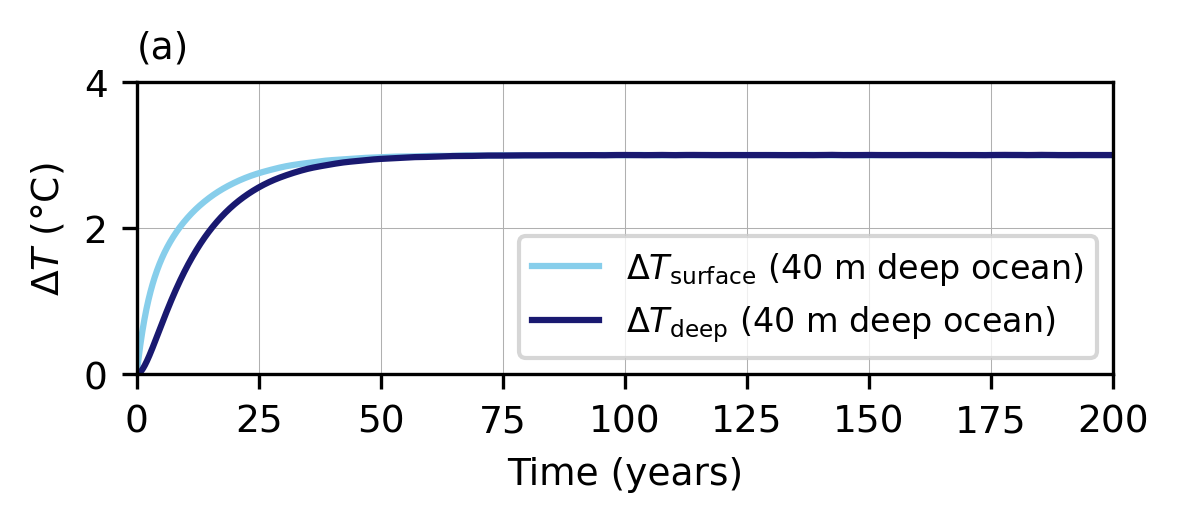

In [4]:
# plot solution time series for a shallow ocean:
# ----------------------------------------------
fig=plt.figure(figsize=(4.2,4.3),dpi=300);
plt.subplot(3,1,1)
plt.plot(time_array_shallow, T_atm_array_shallow, "-", color='SkyBlue',
label="$\\Delta T_{\\rm surface}$ (40 m deep ocean)")
plt.plot(time_array_shallow, T_ocn_array_shallow, "-", color='MidnightBlue',
label="$\\Delta T_{\\rm deep}$ (40 m deep ocean)")
plt.ylabel('$\\Delta T$ (°C)')
plt.xlabel('Time (years)')
plt.xlim([0,200])
plt.ylim([0,4])
#plt.title('Atm/ Ocean temperature anomalies given a sudden 2x CO฀ increase')
plt.legend(loc='lower right',fontsize=fontsize-1)
plt.grid(lw=0.25)
plt.title("(a)",loc="left",fontsize=fontsize)

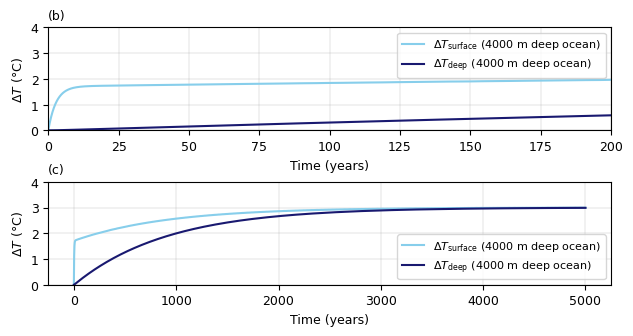

In [5]:
# plot solution time series for a deep ocean:
# -------------------------------------------
plt.subplot(3,1,2)
plt.plot(time_array_deep, T_atm_array_deep, "-", color='SkyBlue',
label="$\\Delta T_{\\rm surface}$ (4000 m deep ocean)")
plt.plot(time_array_deep, T_ocn_array_deep,"-", color='MidnightBlue',
label="$\\Delta T_{\\rm deep}$ (4000 m deep ocean)")
plt.ylabel('$\\Delta T$ (°C)')
plt.xlabel('Time (years)')
plt.xlim([0,200])
plt.ylim([0,4])
#plt.title('Atm/ Ocean temperature anomalies given a sudden 2x CO฀ increase')
plt.legend(loc='upper right',fontsize=fontsize-1)
plt.grid(lw=0.25)
plt.title("(b)",loc="left",fontsize=fontsize)
plt.subplot(3,1,3)
plt.plot(time_array_deep, T_atm_array_deep, "-", color='SkyBlue',
label="$\\Delta T_{\\rm surface}$ (4000 m deep ocean)")
plt.plot(time_array_deep, T_ocn_array_deep,"-", color='MidnightBlue',
label="$\\Delta T_{\\rm deep}$ (4000 m deep ocean)")
plt.ylabel('$\\Delta T$ (°C)')
plt.xlabel('Time (years)')
#plt.xlim([0,200])
plt.ylim([0,4])
#plt.title('Atm/ Ocean temperature anomalies given a sudden 2x CO฀ increase')
plt.legend(loc='lower right',fontsize=fontsize-1)
plt.grid(lw=0.25)
plt.title("(c)",loc="left",fontsize=fontsize)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()
